## Introduction
Movie website usually recommends a list of movies for subscribers. In this project, I am going to show how movie recommendation system is built.

## Methodology

First I construct an array with eight users rating ten movies. The rating is from 1 to 5. Not every user rated each movie, and some of the ratings are missing, labeled as NaN. 

For methods, first, I implemented the global baseline method, and user-based and item-based collaborative filtering. Then I used the Surprise package and applied the global baseline method, user-based and item-based collaborative filtering, and SVD method.

I plot the predicted ratings for qualitative comparison. By visual check, it is hard to tell which algorithm works better.

For quantitative evaluation, I used the public MovieLens dataset. I split into training set and test set. I used Surprise package to fit the training set, and do the prediction on test set. Then I used RMSE and MAE for evaluation on test set.

## Conclusion

Based on my study, on the MovieLens 100k dataset, collaborative filtering (both user-based and item-based) work better than the global baseline method and SVD method.

## Discussion

In spite of the overreliance on traditional methods of model evaluation (e.g. RMSE, MAE) in current studies, in practice, recommenders also need to evaluate based on number of recommendations (e.g. if one movie had two 5 ratings, both 5 star, and a second movie had 100 ratings,  with 95 5-star, and 5 4-star, which should be rated more highly). In the future, a new metric may be designed to take into account the total number of ratings. 


In [4]:
import numpy as np
NaN=np.nan

# construct an array
# rows are eight different users
# columns are ten different movies
arr = np.array([[5.0,NaN,NaN,5,4.5,4.5,NaN,4.5,NaN,NaN],
               [4.5,NaN,NaN,2,NaN,NaN,4.5,3,3.5,NaN],
               [4,NaN,NaN,2,NaN,NaN,4.5,3,3.5,NaN],
               [4.5,4,5,NaN,NaN,2.5,4,NaN,NaN,4.5],
               [NaN,3,4,NaN,3,NaN,NaN,3.5,3.5,4.5],
               [NaN,3.5,NaN,3.5,NaN,4,NaN,4,4,4],
               [NaN,2.5,4,3.5,NaN,NaN,3.5,NaN,NaN,3.5],
               [4.5,4.5,4,NaN,NaN,NaN,NaN,NaN,NaN,4]])

# user names
users=np.array(['Mary','Leonard','Rachel','Chandler',
                'Phoeby','Monica','Ross','Joey'])
# movie names
movies=np.array(["Forrest Gump","Iron Man","Matrix",
                 "Doraemon","Kunfu Panda",
                 "Legally Blond","Brave Heart","Frozen",
                 "Departed","Advengers"])  

In [5]:
# change all the NaN into 0
arr[np.isnan(arr)]=0
arr

array([[ 5. ,  0. ,  0. ,  5. ,  4.5,  4.5,  0. ,  4.5,  0. ,  0. ],
       [ 4.5,  0. ,  0. ,  2. ,  0. ,  0. ,  4.5,  3. ,  3.5,  0. ],
       [ 4. ,  0. ,  0. ,  2. ,  0. ,  0. ,  4.5,  3. ,  3.5,  0. ],
       [ 4.5,  4. ,  5. ,  0. ,  0. ,  2.5,  4. ,  0. ,  0. ,  4.5],
       [ 0. ,  3. ,  4. ,  0. ,  3. ,  0. ,  0. ,  3.5,  3.5,  4.5],
       [ 0. ,  3.5,  0. ,  3.5,  0. ,  4. ,  0. ,  4. ,  4. ,  4. ],
       [ 0. ,  2.5,  4. ,  3.5,  0. ,  0. ,  3.5,  0. ,  0. ,  3.5],
       [ 4.5,  4.5,  4. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  4. ]])

In [6]:
# Global baseline approach

# Calculate the overal average ratings
cnt = (arr>0).sum()
ave = arr.sum()/cnt

# calculate bias for each movie
sum0=arr.sum(0)
cnt0=(arr>0).sum(0)
bi = sum0/cnt0-ave

# calculate bias for each user
a=np.ones(8)
c = np.dot(a[:, None], bi[None, :]) 

diff=arr-c
sum1 = diff.sum(1)
cnt1 = (arr>0).sum(1)
bu = sum1/cnt1-ave

# predict those items that has no ratings
a=np.ones(10)
cc = np.dot(bu[:, None], a[None, :]) 

pred = (ave+c+cc)*(arr<1)
pred

array([[ 0.        ,  4.37      ,  5.12      ,  0.        ,  0.        ,
         0.        ,  4.995     ,  0.        ,  4.495     ,  4.97      ],
       [ 0.        ,  3.17      ,  3.92      ,  0.        ,  3.42      ,
         3.33666667,  0.        ,  0.        ,  0.        ,  3.77      ],
       [ 0.        ,  3.07      ,  3.82      ,  0.        ,  3.32      ,
         3.23666667,  0.        ,  0.        ,  0.        ,  3.67      ],
       [ 0.        ,  0.        ,  0.        ,  3.45277778,  4.00277778,
         0.        ,  0.        ,  3.85277778,  3.87777778,  0.        ],
       [ 4.25277778,  0.        ,  0.        ,  2.95277778,  0.        ,
         3.41944444,  3.87777778,  0.        ,  0.        ,  0.        ],
       [ 4.50277778,  0.        ,  4.25277778,  0.        ,  3.75277778,
         0.        ,  4.12777778,  0.        ,  0.        ,  0.        ],
       [ 4.07      ,  0.        ,  0.        ,  0.        ,  3.32      ,
         3.23666667,  0.        ,  3.17      

In [7]:
# predict those items that has no ratings

a=np.ones(10)
cc = np.dot(bu[:, None], a[None, :]) 

pred = (ave+c+cc)*(arr<1)
pred

array([[ 0.        ,  4.37      ,  5.12      ,  0.        ,  0.        ,
         0.        ,  4.995     ,  0.        ,  4.495     ,  4.97      ],
       [ 0.        ,  3.17      ,  3.92      ,  0.        ,  3.42      ,
         3.33666667,  0.        ,  0.        ,  0.        ,  3.77      ],
       [ 0.        ,  3.07      ,  3.82      ,  0.        ,  3.32      ,
         3.23666667,  0.        ,  0.        ,  0.        ,  3.67      ],
       [ 0.        ,  0.        ,  0.        ,  3.45277778,  4.00277778,
         0.        ,  0.        ,  3.85277778,  3.87777778,  0.        ],
       [ 4.25277778,  0.        ,  0.        ,  2.95277778,  0.        ,
         3.41944444,  3.87777778,  0.        ,  0.        ,  0.        ],
       [ 4.50277778,  0.        ,  4.25277778,  0.        ,  3.75277778,
         0.        ,  4.12777778,  0.        ,  0.        ,  0.        ],
       [ 4.07      ,  0.        ,  0.        ,  0.        ,  3.32      ,
         3.23666667,  0.        ,  3.17      

In [8]:
# For each user, recommend the movie with the highest rating
argmax1=np.argmax(pred, axis=1)
movies[argmax1]

array(['Matrix', 'Matrix', 'Matrix', 'Kunfu Panda', 'Forrest Gump',
       'Forrest Gump', 'Forrest Gump', 'Brave Heart'], 
      dtype='<U13')

In [9]:
# calculate consine similarity
def cos_dis(rating1, rating2):
    
    # getting the common part
    mask=(rating1>0) & (rating2>0)
    if np.size(mask)==0:
        return 0
    
    #print(arr1)
    #print(arr2)
    
    a1=np.linalg.norm(rating1)
    a2=np.linalg.norm(rating2)
    
    return np.dot(rating1, rating2)/(a1*a2)   

In [10]:
# user-based simlarity matrix using cosine similarity

N=arr.shape[0]
simMat = np.empty([N,N])
for i in range(N):
    for j in range(N-1-i):
        sim=cos_dis(arr[i],arr[i+1+j])      
        simMat[i][i+1+j]=sim
        simMat[i+1+j][i]=sim
simMat

array([[ -0.00000000e+000,   5.39061215e-001,   5.27083998e-001,
          3.14853015e-001,   3.13205025e-001,   5.40393702e-001,
          2.16491164e-001,   2.51097071e-001],
       [  5.39061215e-001,   2.17425075e-314,   9.98592474e-001,
          4.63115704e-001,   3.16160960e-001,   4.32607880e-001,
          3.65264543e-001,   2.93297354e-001],
       [  5.27083998e-001,   9.98592474e-001,   0.00000000e+000,
          4.50682703e-001,   3.26902741e-001,   4.47306024e-001,
          3.77674652e-001,   2.69566515e-001],
       [  3.14853015e-001,   4.63115704e-001,   4.50682703e-001,
          2.17425078e-314,   5.78052070e-001,   4.38312244e-001,
          7.63691314e-001,   8.79177960e-001],
       [  3.13205025e-001,   3.16160960e-001,   3.26902741e-001,
          5.78052070e-001,   1.63393676e-312,   6.76786257e-001,
          5.75822160e-001,   6.28636112e-001],
       [  5.40393702e-001,   4.32607880e-001,   4.47306024e-001,
          4.38312244e-001,   6.76786257e-001,   1.

In [11]:
np.set_printoptions(precision=2)

In [13]:
# user-based collaborative filtering
# predict the unknown ratings
M=arr.shape[1]
pred_cf = np.empty([N,M])
for i in range(N):
    for j in range(M):
        if arr[i][j]==0:
            b = np.argsort(simMat[i])
            rate = (arr[b[N-1]][j]*simMat[i][b[N-1]]
                    +arr[b[N-2]][j]*simMat[i][b[N-2]]
                    +arr[b[N-3]][j]*simMat[i][b[N-3]]
                    +arr[b[N-4]][j]*simMat[i][b[N-4]])/(simMat[i][b[N-1]]+simMat[i][b[N-2]]+simMat[i][b[N-3]]+simMat[i][b[N-4]])
            
            pred_cf[i][j]=rate
pred_cf          

array([[ 0.  ,  1.64,  0.82,  0.  ,  0.  ,  0.  ,  3.15,  0.  ,  3.07,
         1.86],
       [ 0.  ,  1.38,  0.95,  0.  ,  1.  ,  2.18,  0.  ,  0.  ,  0.  ,
         1.57],
       [ 0.  ,  1.39,  0.93,  0.  ,  0.98,  2.18,  0.  ,  0.  ,  0.  ,
         1.58],
       [ 0.  ,  0.  ,  0.  ,  1.34,  0.65,  0.  ,  0.  ,  1.27,  1.36,  0.  ],
       [ 2.21,  0.  ,  0.  ,  1.78,  0.  ,  1.69,  1.76,  0.  ,  0.  ,  0.  ],
       [ 2.09,  0.  ,  2.16,  0.  ,  2.08,  0.  ,  1.73,  0.  ,  0.  ,  0.  ],
       [ 2.56,  0.  ,  0.  ,  0.  ,  0.7 ,  1.57,  0.  ,  1.61,  1.61,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.42,  0.74,  1.49,  2.26,  1.49,  1.49,  0.  ]])

In [14]:
# item-based simlarity matrix
# using cosine similarity

M=arr.shape[1]
simMat_m = np.empty([M,M])
for i in range(M):
    for j in range(M-1-i):
        sim=cos_dis(arr[:,i],arr[:,i+1+j])
        
        #print(i,i+1+j)        
        simMat_m[i][i+1+j]=sim
        simMat_m[i+1+j][i]=sim
simMat_m

array([[ -0.00e+000,   4.75e-001,   4.70e-001,   5.49e-001,   4.12e-001,
          5.13e-001,   6.73e-001,   5.84e-001,   4.06e-001,   4.12e-001],
       [  4.75e-001,   0.00e+000,   8.80e-001,   3.47e-001,   2.08e-001,
          4.61e-001,   3.74e-001,   3.76e-001,   4.22e-001,   9.83e-001],
       [  4.70e-001,   8.80e-001,   0.00e+000,   2.16e-001,   2.60e-001,
          2.24e-001,   4.80e-001,   2.01e-001,   2.26e-001,   8.96e-001],
       [  5.49e-001,   3.47e-001,   2.16e-001,   0.00e+000,   5.49e-001,
          7.38e-001,   4.81e-001,   7.84e-001,   5.08e-001,   3.76e-001],
       [  4.12e-001,   2.08e-001,   2.60e-001,   5.49e-001,   0.00e+000,
          5.74e-001,   0.00e+000,   6.97e-001,   2.67e-001,   2.71e-001],
       [  5.13e-001,   4.61e-001,   2.24e-001,   7.38e-001,   5.74e-001,
          0.00e+000,   1.85e-001,   6.82e-001,   3.38e-001,   4.54e-001],
       [  6.73e-001,   3.74e-001,   4.80e-001,   4.81e-001,   0.00e+000,
          1.85e-001,   3.06e-230,   3.99e-001

In [15]:
# item-based collaborative filtering
# predict the unknown ratings

N=arr.shape[0]
M=arr.shape[1]

pred_cf_m = np.empty([N,M])
for i in range(N):
    for j in range(M):
        if arr[i][j]==0:
            b = np.argsort(simMat_m[j])
            rate = (arr[i][b[N-1]]*simMat_m[j][b[N-1]]
                    +arr[i][b[N-2]]*simMat_m[j][b[N-2]]
                    +arr[i][b[N-3]]*simMat_m[j][b[N-3]]
                    +arr[i][b[N-4]]*simMat_m[j][b[N-4]])/(simMat_m[j][b[N-1]]+simMat_m[j][b[N-2]]+simMat_m[j][b[N-3]]+simMat_m[j][b[N-4]])
            
            pred_cf_m[i][j]=rate

pred_cf_m  

array([[ 0.  ,  3.54,  2.45,  0.  ,  0.  ,  0.  ,  2.39,  0.  ,  2.52,
         3.41],
       [ 0.  ,  2.74,  3.53,  0.  ,  2.59,  1.15,  0.  ,  0.  ,  0.  ,
         2.71],
       [ 0.  ,  2.6 ,  3.36,  0.  ,  2.46,  1.03,  0.  ,  0.  ,  0.  ,  2.6 ],
       [ 0.  ,  0.  ,  0.  ,  2.11,  2.05,  0.  ,  0.  ,  2.61,  3.12,  0.  ],
       [ 1.65,  0.  ,  0.  ,  1.64,  0.  ,  2.57,  2.9 ,  0.  ,  0.  ,  0.  ],
       [ 2.81,  0.  ,  0.63,  0.  ,  2.72,  0.  ,  2.77,  0.  ,  0.  ,  0.  ],
       [ 2.49,  0.  ,  0.  ,  0.  ,  1.91,  1.37,  0.  ,  0.62,  2.48,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.18,  1.96,  3.1 ,  2.  ,  1.81,  3.11,  0.  ]])

In [16]:
# transfer the user-movie rating matrix into pandas dataframe

import pandas as pd

df = pd.DataFrame(arr, 
               index=pd.Index(users, name='Users'),
               columns=pd.Index(movies, name='Movies'))

result=df.stack()
result=pd.DataFrame(result)
result.to_csv('stackData.csv')



In [17]:
df = pd.read_csv('stackData.csv',sep=',')
df.columns=['Users','Movies','Rating']

df=df[~df['Rating'].isin([0])]
#df=df[~df.iloc[:,2].isin([0])]
df.head(5)

,Users,Movies,Rating
0,Mary,Forrest Gump,5.0
3,Mary,Doraemon,5.0
4,Mary,Kunfu Panda,4.5
5,Mary,Legally Blond,4.5
7,Mary,Frozen,4.5


In [18]:
# using surprise package

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df[['Users', 'Movies', 'Rating']], reader)


In [19]:
# global baseline method

from surprise import BaselineOnly, evaluate
algo = BaselineOnly()

trainset = data.build_full_trainset()
algo.fit(trainset)

Estimating biases using als...


In [20]:
# use global baseline method to predict unknown ratings
N=arr.shape[0]
M=arr.shape[1]

pred_base = np.empty([N,M])
for i in range(N):
    for j in range(M):
        if arr[i][j]==0:
            uid=users[i]
            iid=movies[j]
            pred1 = algo.predict(uid, iid, r_ui=4)
            pred_base[i][j]=pred1.est


In [21]:
np.set_printoptions(precision=2)
pred_base

array([[ 5.  ,  3.95,  4.18,  5.  ,  4.5 ,  4.5 ,  4.16,  4.5 ,  4.02,
         4.15],
       [ 4.5 ,  3.64,  3.87,  2.  ,  3.72,  3.69,  4.5 ,  3.  ,  3.5 ,
         3.84],
       [ 4.  ,  3.62,  3.85,  2.  ,  3.7 ,  3.66,  4.5 ,  3.  ,  3.5 ,
         3.82],
       [ 4.5 ,  4.  ,  5.  ,  3.68,  3.86,  2.5 ,  4.  ,  3.81,  3.85,  4.5 ],
       [ 3.98,  3.  ,  4.  ,  3.56,  3.  ,  3.7 ,  3.86,  3.5 ,  3.5 ,  4.5 ],
       [ 4.06,  3.5 ,  3.98,  3.5 ,  3.83,  4.  ,  3.95,  4.  ,  4.  ,  4.  ],
       [ 3.94,  2.5 ,  4.  ,  3.5 ,  3.7 ,  3.66,  3.5 ,  3.65,  3.68,  3.5 ],
       [ 4.5 ,  4.5 ,  4.  ,  3.7 ,  3.88,  3.84,  4.01,  3.83,  3.86,  4.  ]])

In [22]:
# user-based CF method

from surprise import KNNBasic
algo_user = KNNBasic()
algo_user.fit(trainset)

# use user-based collaborative filtering method 
# to predict unknown rating
pred_cf_user = np.empty([N,M])
for i in range(N):
    for j in range(M):
        if arr[i][j]==0:
            uid=users[i]
            iid=movies[j]
            
            b = algo_user.predict(uid,iid).est 
            pred_cf_user[i][j] = b
pred_cf_user

Computing the msd similarity matrix...
Done computing similarity matrix.


array([[ 0.  ,  3.7 ,  4.18,  0.  ,  0.  ,  0.  ,  4.05,  0.  ,  3.7 ,
         4.08],
       [ 0.  ,  3.67,  4.28,  0.  ,  3.28,  3.21,  0.  ,  0.  ,  0.  ,
         4.19],
       [ 0.  ,  3.61,  4.28,  0.  ,  3.27,  3.24,  0.  ,  0.  ,  0.  ,  4.2 ],
       [ 0.  ,  0.  ,  0.  ,  2.82,  3.52,  0.  ,  0.  ,  3.42,  3.59,  0.  ],
       [ 4.42,  0.  ,  0.  ,  2.93,  0.  ,  3.6 ,  4.17,  0.  ,  0.  ,  0.  ],
       [ 4.51,  0.  ,  4.19,  0.  ,  3.59,  0.  ,  4.05,  0.  ,  0.  ,  0.  ],
       [ 4.48,  0.  ,  0.  ,  0.  ,  3.46,  3.63,  0.  ,  3.61,  3.66,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  3.09,  3.89,  3.69,  4.24,  3.56,  3.61,  0.  ]])

In [23]:
# item-based CF method
algo_item = KNNBasic(sim_options={'user_based': False})
algo_item.fit(trainset)

# use item-based collaborative filtering method 
# to predict unknown ratings
N=arr.shape[0]
M=arr.shape[1]

pred_cf_item = np.empty([N,M])
for i in range(N):
    for j in range(M):
        if arr[i][j]==0:
            uid=users[i]
            iid=movies[j]

            b = algo_item.predict(uid,iid).est 
            pred_cf_item[i][j] = b

pred_cf_item

Computing the msd similarity matrix...
Done computing similarity matrix.


array([[ 0.  ,  4.7 ,  4.76,  0.  ,  0.  ,  0.  ,  4.82,  0.  ,  4.64,
         4.79],
       [ 0.  ,  3.54,  3.45,  0.  ,  3.24,  3.19,  0.  ,  0.  ,  0.  ,
         3.53],
       [ 0.  ,  3.42,  3.35,  0.  ,  3.12,  3.14,  0.  ,  0.  ,  0.  ,
         3.42],
       [ 0.  ,  0.  ,  0.  ,  4.04,  3.88,  0.  ,  0.  ,  3.97,  3.99,  0.  ],
       [ 3.6 ,  0.  ,  0.  ,  3.63,  0.  ,  3.42,  3.79,  0.  ,  0.  ,  0.  ],
       [ 3.84,  0.  ,  3.84,  0.  ,  3.81,  0.  ,  3.85,  0.  ,  0.  ,  0.  ],
       [ 3.37,  0.  ,  0.  ,  0.  ,  3.21,  3.31,  0.  ,  3.37,  3.37,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  4.17,  4.35,  4.31,  4.25,  4.23,  4.25,  0.  ]])

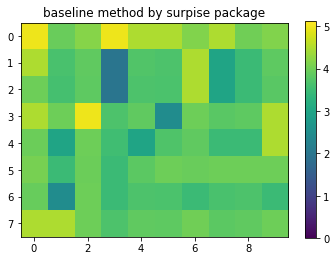

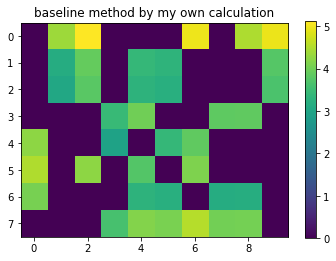

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# compare the prediction between surprise package and my own calculation
# global baseline method

# using the same color scale for both plots
mins = []
mins.append(np.min(pred))
mins.append(np.min(pred_base))
vmin = np.min(mins)

maxes = []
maxes.append(np.max(pred))
maxes.append(np.max(pred_base))
vmax = np.max(maxes)

# global baseline method by package surprise
fig1,ax1=plt.subplots()
img1=ax1.imshow(pred_base,vmin = vmin,vmax = vmax)
ax1.set_title('baseline method by surpise package')
fig1.colorbar(img1)

# my own method
fig11,ax11=plt.subplots()
img11=ax11.imshow(pred,vmin = vmin,vmax = vmax)
ax11.set_title('baseline method by my own calculation')
fig11.colorbar(img11)




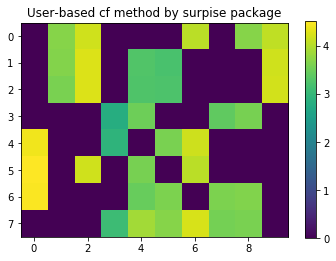

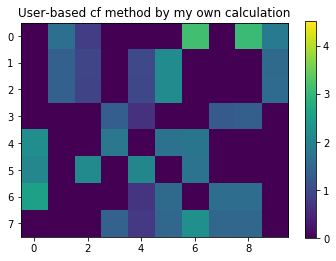

In [25]:
# compare the prediction between surprise package and my own calculation
# user based collaborative filtering 

# using the same color scale for both plots
mins = []
mins.append(np.min(pred_cf))
mins.append(np.min(pred_cf_user))
vmin = np.min(mins)

maxes = []
maxes.append(np.max(pred_cf))
maxes.append(np.max(pred_cf_user))
vmax = np.max(maxes)

#user-based collaborative filtering by surprise package
fig,ax=plt.subplots()
img=ax.imshow(pred_cf_user,vmin = vmin,vmax = vmax) 
ax.set_title('User-based cf method by surpise package')
fig.colorbar(img)

#item-based collaborative filtering by surprise package
fig2,ax2=plt.subplots()
img2=ax2.imshow(pred_cf,vmin = vmin,vmax = vmax) 
ax2.set_title('User-based cf method by my own calculation')
fig2.colorbar(img2)

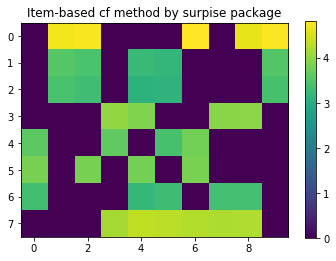

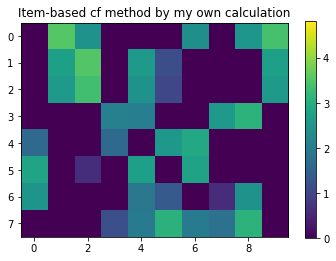

In [26]:
# compare the prediction between surprise package and my own calculation
# item based collaborative filtering 

# using the same color scale for both plots
mins = []
mins.append(np.min(pred_cf_m))
mins.append(np.min(pred_cf_item))
vmin = np.min(mins)

maxes = []
maxes.append(np.max(pred_cf_m))
maxes.append(np.max(pred_cf_item))
vmax = np.max(maxes)

#user-based collaborative filtering by surprise package
fig,ax=plt.subplots()
img=ax.imshow(pred_cf_item,vmin = vmin,vmax = vmax) 
ax.set_title('Item-based cf method by surpise package')
fig.colorbar(img)

#item-based collaborative filtering by surprise package
fig2,ax2=plt.subplots()
img2=ax2.imshow(pred_cf_m,vmin = vmin,vmax = vmax) 
ax2.set_title('Item-based cf method by my own calculation')
fig2.colorbar(img2)

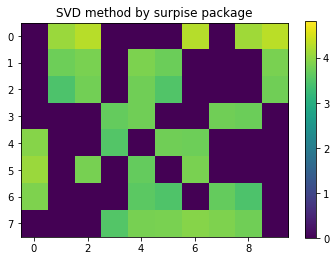

In [27]:
### Using SVD algorithm to calculate the unknown ratings

from surprise import SVD
algo12 = SVD()
algo12.fit(trainset)

N=arr.shape[0]
M=arr.shape[1]

pred_cf_svd = np.empty([N,M])
for i in range(N):
    for j in range(M):
        if arr[i][j]==0:
            uid=users[i]
            iid=movies[j]

            b = algo12.predict(uid,iid).est 
            pred_cf_svd[i][j] = b

pred_cf_svd

fig0,ax0=plt.subplots()
img0=ax0.imshow(pred_cf_svd,vmin = vmin,vmax = vmax) 
ax0.set_title('SVD method by surpise package')
fig0.colorbar(img0)

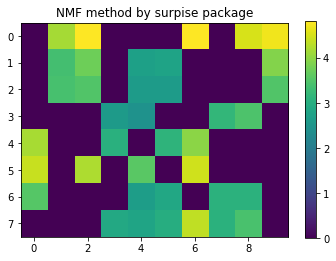

In [28]:
### ### using NMF algorithm to calculate the unknown ratings

from surprise import NMF
algo11 = NMF()
algo11.fit(trainset)

N=arr.shape[0]
M=arr.shape[1]

pred_cf_nmf = np.empty([N,M])
for i in range(N):
    for j in range(M):
        if arr[i][j]==0:
            uid=users[i]
            iid=movies[j]

            b = algo11.predict(uid,iid).est 
            pred_cf_nmf[i][j] = b

pred_cf_nmf

fig,ax=plt.subplots()
img=ax.imshow(pred_cf_nmf,vmin = vmin,vmax = vmax) 
ax.set_title('NMF method by surpise package')
fig.colorbar(img)

In [29]:
# This function is to recommend a list of nearest neighbors given one movie

def getSimilarityItems(iid):
    # Retieve inner id of the user 
    inner_id = algo_item.trainset.to_inner_iid(iid)

    # Retrieve inner ids of the nearest neighbors of the item
    neighbors = algo_item.get_neighbors(inner_id, k=3)
    neighbors = (algo_item.trainset.to_raw_iid(inner_id)
                           for inner_id in neighbors)
    
    return neighbors


print('The 3 nearest neighbors of Matrix are:')
matrix_neighbors = getSimilarityItems('Matrix')
for m in matrix_neighbors:
    print(m)

The 3 nearest neighbors of Matrix are:
Advengers
Forrest Gump
Doraemon


In [30]:
# recommend the list of nearest neighbors given one user

def getSimilarityUsers(uid):
    # Retieve inner id of the user 
    inner_id = algo_user.trainset.to_inner_uid(uid)

    # Retrieve inner ids of the nearest neighbors of the user
    neighbors = algo_user.get_neighbors(inner_id, k=3)
    neighbors = (algo_user.trainset.to_raw_uid(inner_id)
                           for inner_id in neighbors)
    
    return neighbors

print('The 3 nearest neighbors of Mary are:')
matrix_neighbors = getSimilarityUsers('Mary')
for m in matrix_neighbors:
    print(m)

The 3 nearest neighbors of Mary are:
Joey
Monica
Phoeby


In [31]:
from surprise import Dataset
data = Dataset.load_builtin('ml-100k')

In [32]:

from surprise import accuracy
from surprise.model_selection import train_test_split

from surprise import BaselineOnly
algo_base = BaselineOnly()

# user-based CF method
from surprise import KNNBasic
algo_user = KNNBasic()

# default is k=40
##algo_user = KNNBasic(k=5) 

# # pearson;msd
#sim_options = {'name': 'cosine',
#               'user_based': False  # compute  similarities between items
#               }
#algo = KNNBasic(sim_options=sim_options)

# item-based CF method
algo_item = KNNBasic(sim_options={'user_based': False})

from surprise import SVD
algo_svd = SVD()


In [33]:
# sample random trainset and testset, test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=.25)

rmseAll=[]
maeAll=[]

# Train the algorithm on the trainset, and predict ratings for the testset
algo_base.fit(trainset)
predictions = algo_base.test(testset)
acc = accuracy.rmse(predictions)
rmseAll.append(acc)
maeAll.append(accuracy.mae(predictions))

algo_user.fit(trainset)
predictions = algo_user.test(testset)
acc = accuracy.rmse(predictions)
rmseAll.append(acc)
maeAll.append(accuracy.mae(predictions))

algo_item.fit(trainset)
predictions = algo_item.test(testset)
acc = accuracy.rmse(predictions)
rmseAll.append(acc)
maeAll.append(accuracy.mae(predictions))

algo_svd.fit(trainset)
predictions = algo_svd.test(testset)
acc = accuracy.rmse(predictions)
rmseAll.append(acc)
maeAll.append(accuracy.mae(predictions))

Estimating biases using als...
RMSE: 0.9413
MAE:  0.7465
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9806
MAE:  0.7751
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9742
MAE:  0.7700
RMSE: 0.9381
MAE:  0.7396


In [34]:
import pandas as pd
algos = ['Baseline', 'user-based CF', 'Item-based CF', 'SVD']
rmseSeries = pd.Series(rmseAll, index=algos)
maeSeries = pd.Series(maeAll, index=algos)

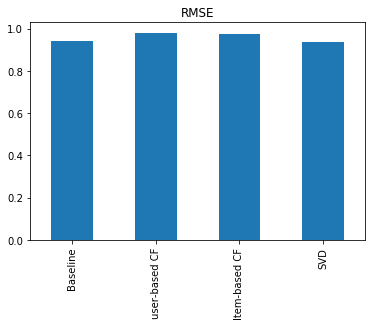

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

rmseSeries.plot(kind='bar',title='RMSE')

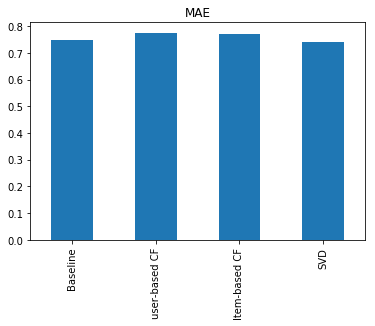

In [36]:
maeSeries.plot(kind='bar',title='MAE')